In [7]:
#@title Imports & Utils
# Imports
import numpy as onp
import matplotlib.pyplot as plt
# from jax.config import config ; config.update('jax_enable_x64', True)
import jax.numpy as jnp
import jax
from jax import random
from jax import jit
from jax import vmap
from jax import lax
vectorize = np.vectorize

In [8]:
def hardCore(x):
  eps = 1e-2
  return jnp.where(x<0.2, 1/jnp.exp(x/eps),0)

(0.0, 0.2)

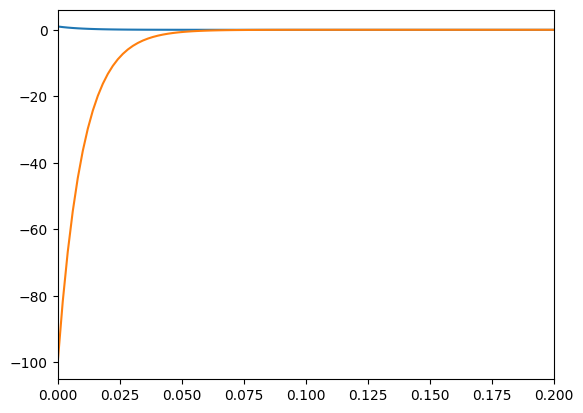

In [9]:
hCdx = jax.grad(hardCore)
hCdxVec = jax.vmap(hCdx)

xmax = 0.2
x = jnp.linspace(0,xmax,100)
plt.plot(x, hardCore(x))
plt.plot(x, hCdxVec(x))
plt.xlim(0,xmax)

In [10]:
key = random.PRNGKey(42)
nmax = 1000
xLst = random.normal(key, shape=(nmax,))

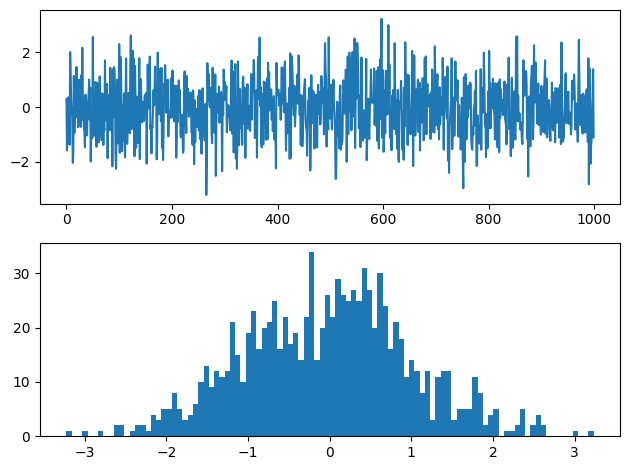

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(xLst)

ax2.hist(xLst, bins=100)

plt.tight_layout()

[1. 1.]


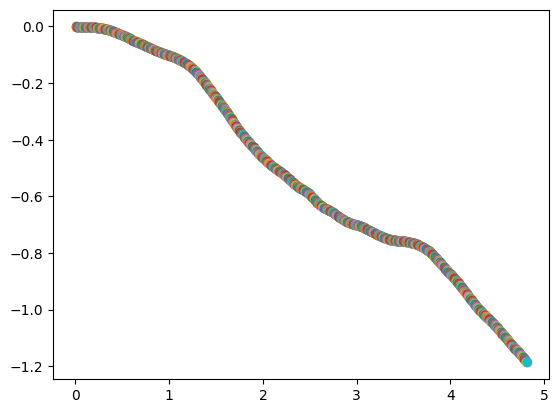

In [13]:
rInit = jnp.array([0, 0])
print(rInit + jnp.ones(2))

rInit = jnp.array([0, 0])
dt = 1e-2
diff = 1e-2
rp = rInit
thetp = 0
vo = 0.5
for ind in jnp.arange(nmax):
  thetn = thetp + jnp.sqrt(2*diff*dt)*xLst[ind]
  rn = rp + vo*dt*jnp.array([jnp.cos(thetn), jnp.sin(thetn)])
  rp = rn
  thetp = thetn
  plt.plot(rn[0], rn[1], 'o')